# Machine Learning and Neural Networks with Python

## Introduction

In this activity we will use a combination of standard and popular Python libraries. While none of them are "entry level", they are still a good first choice when exploring simple machine learning concepts. We will also explore creating a neural network layer from scratch.

The libraries we will use are:
- [NumPy](https://numpy.org/doc/stable/user/index.html#user)
- [Matplotlib](https://matplotlib.org/stable/users/index.html)
- [scikit-learn](https://scikit-learn.org/stable/user_guide.html)

There is no expectation of you to know or to have used these, however links to their respective documentation have been provided in case you are interested.

At the start of every session that uses this website (https://jupyter.org/try-jupyter/lab/), we need to install these libraries using the following code:

In [1]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Some additional libraries and frameworks to consider exploring if you are interested in AI/ML work are:
- [TensorFlow](https://www.tensorflow.org/learn)
- [PyTorch](https://pytorch.org/get-started/locally/)
- [Keras](https://keras.io/getting_started/)

These are more advanced and more involved however they are the most widely used once in both academia and industry.

Once the first three libraries have been successfully installed, we can then import them into the Jupyter Notebook:

In [3]:
# General use libraries
import numpy as np
import matplotlib.pyplot as plt

# Linear regression
from sklearn.linear_model import LinearRegression

# K-Nearest Neighbours
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

Matplotlib is building the font cache; this may take a moment.


Now we are ready to use them!

## Linear Regression

We will apply the linear regression method to simulated readings of a simple sensor. For this to work, we need two sets of data:
- `x` values, or the readings of our sensor - in our case, these should be numbers between 0 and 1023 as these are representative of what electronics like a sound sensor or a light sensor give
- `y` values, or the actual meaning of the sensor data - in our case, these can be distances between a light sensor and an object, or between a source of sound and a sound sensor

Needless to say, we need to have the same number of `x` and `y` values, that is, we need a number of paired `x`-`y` values.

We will start by using the following code:

In [20]:
# These numbers are representative of actual sensor readings for a light sensor:
sensor_readings = np.array([100, 105, 200, 210, 300, 305, 455, 577, 677, 800, 950, 1023])
sensor_readings_sklearn = sensor_readings.reshape(-1, 1)

# These numbers are representative of how far away a source of shadow was from the sensor in centimetres:
distance = np.array([1, 2, 5, 7, 10, 12, 15, 18, 19, 20, 21, 23])

# This is a simple way to confirm you have the same number of `x` and `y` values - the numbers should be the same.
print(f"Number of x values: {sensor_readings.size}")
print(f"Number of y values: {distance.size}")

Number of x values: 12
Number of y values: 12


In [21]:
# We now apply the Linear Regression algorithm to these numbers.
# This is as simple as using the following line of code.
# If you are interested in the maths behind this, you can have a look at this page from the Turing Institute:
# https://www.turing.com/kb/beginners-guide-to-complete-mathematical-intuition-behind-linear-regression-algorithms

model = LinearRegression().fit(sensor_readings_sklearn, distance)

Since we are doing a linear regression, or a simple straight line fit, we need to have two parameters - the intercept point and the slope. We can see what those are using the following code:

In [22]:
print(f"The intercept is {model.intercept_}")
print(f"The slope is {model.coef_[0]}")
print(f"The linear relationship is y = f(x) = {model.coef_[0]} * x + {model.intercept_}")

The intercept is 2.035884322870288
The slope is 0.022548121382945728
The linear relationship is y = f(x) = 0.022548121382945728 * x + 2.035884322870288


We can also plot the results to see how the fitted line matches our data:

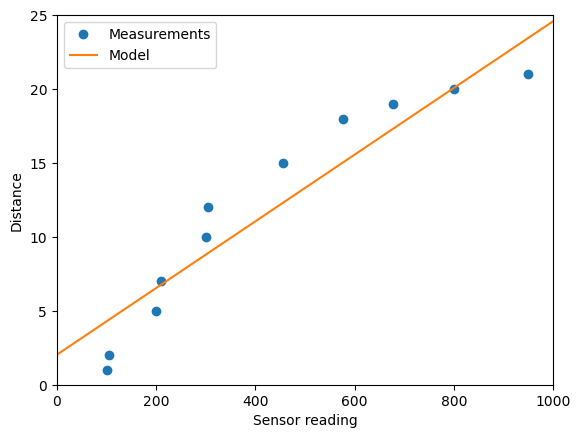

In [23]:
# This is the code to plot the original measurements
plt.plot(sensor_readings, distance, 'o', label="Measurements")

# We need to calculate the points which we need to use to plot the model
x = np.arange(0, 1023, 1)
y = model.coef_[0] * x + model.intercept_
plt.plot(x, y, label="Model")

# We format the graph to make it look professional
plt.xlabel("Sensor reading")
plt.ylabel("Distance")
plt.xlim(0, 1000)
plt.ylim(0, 25)
plt.legend()

In [28]:
# We can now use our model to predict what distance would correspond to a new sensor reading:
new_reading = 333
new_distance = model.predict(np.array([new_reading]).reshape(1, -1))
print(f"The predicted distance corresponding to {new_reading} is {new_distance[0]:.2f} cm")

The predicted distance corresponding to 333 is 9.54 cm


Some things to consider:
- What if we add more data points?
- What is the nature of the data vs the nature of the fit?
- What if there was noise added to the measurements?
- What if there were outliers?

Let's examine the last two questions using some additional code. We will begin with the case of an outlier as that is quicker and easier.

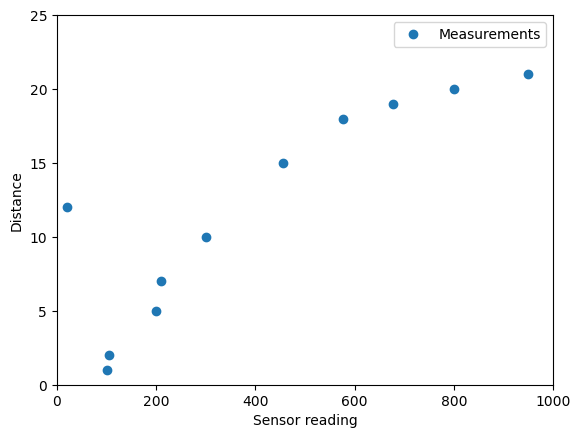

In [25]:
# We will reuse some of the previous code, however note the significantly different sensor
# reading between 300 and 455:
sensor_readings = np.array([100, 105, 200, 210, 300, 20, 455, 577, 677, 800, 950, 1023])
sensor_readings_sklearn = sensor_readings.reshape(-1, 1)

# We keep these the same:
distance = np.array([1, 2, 5, 7, 10, 12, 15, 18, 19, 20, 21, 23])

# Let's plot this new case before we proceed to do the linear regression
plt.plot(sensor_readings_sklearn, distance, 'o', label="Measurements")
plt.xlabel("Sensor reading")
plt.ylabel("Distance")
plt.xlim(0, 1000)
plt.ylim(0, 25)
plt.legend()

Based on this new graph, what do you expect would happen to the Linear Regression model?

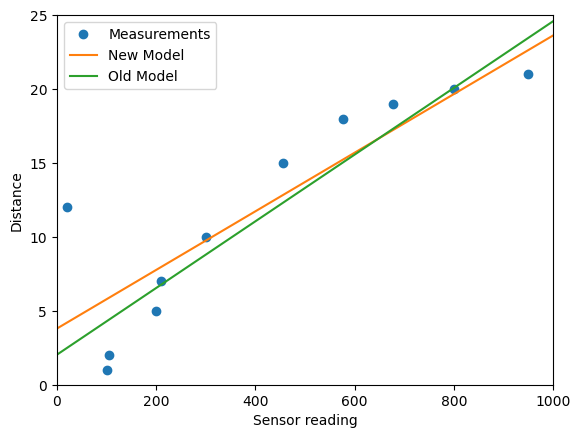

In [27]:
# Well, let's see! Start by fitting the model:
model_new = LinearRegression().fit(sensor_readings_sklearn, distance)

# And then plot the results:
plt.plot(sensor_readings, distance, 'o', label="Measurements")
x = np.arange(0, 1023, 1)
y = model_new.coef_[0] * x + model_new.intercept_
plt.plot(x, y, label="New Model")

# Let's compare against the old model:
x = np.arange(0, 1023, 1)
y = model.coef_[0] * x + model.intercept_
plt.plot(x, y, label="Old Model")

plt.xlabel("Sensor reading")
plt.ylabel("Distance")
plt.xlim(0, 1000)
plt.ylim(0, 25)
plt.legend()

In [30]:
# What's happened to the predicted distance for a new sensor reading?
new_reading = 333
new_distance = model_new.predict(np.array([new_reading]).reshape(1, -1))
print(f"The predicted distance corresponding to {new_reading} is {new_distance[0]:.2f} cm")

The predicted distance corresponding to 333 is 10.40 cm


Let's see what happens when we add a bit of noise to our sensor readings - something that almost always happens in practice

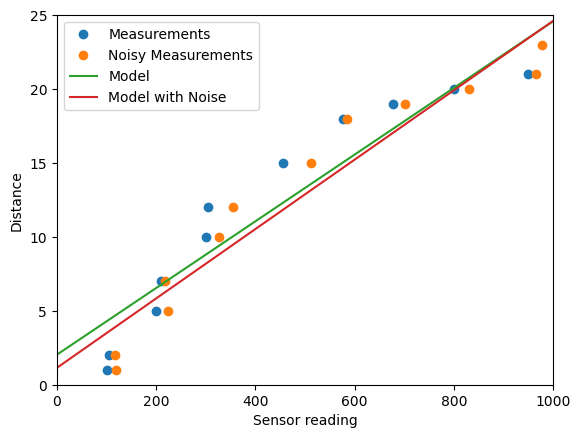

In [43]:
# Our original sensor and distance readings
sensor_readings = np.array([100, 105, 200, 210, 300, 305, 455, 577, 677, 800, 950, 1023])
sensor_readings_sklearn = sensor_readings.reshape(-1, 1)

# These numbers are representative of how far away a source of shadow was from the sensor in centimetres:
distance = np.array([1, 2, 5, 7, 10, 12, 15, 18, 19, 20, 21, 23])

# After you run this code, experiment with changing the value to 10000 and 1000000
noise_amount = 1000
sensor_noise = np.random.normal(0, np.sqrt(noise_amount), len(sensor_readings))

noisy_readings = sensor_readings + sensor_noise
noisy_readings_sklearn = noisy_readings.reshape(-1, 1)

model = LinearRegression().fit(sensor_readings_sklearn, distance)
model_noise = LinearRegression().fit(noisy_readings_sklearn, distance)

plt.plot(sensor_readings, distance, 'o', label="Measurements")
plt.plot(noisy_readings, distance, 'o', label="Noisy Measurements")

x = np.arange(0, 1023, 1)
y = model.coef_[0] * x + model.intercept_
plt.plot(x, y, label="Model")

x = np.arange(0, 1023, 1)
y = model_noise.coef_[0] * x + model_noise.intercept_
plt.plot(x, y, label="Model with Noise")

plt.xlabel("Sensor reading")
plt.ylabel("Distance")
plt.xlim(0, 1000)
plt.ylim(0, 25)
plt.legend()

## K-Nearest Neighbours (KNN)

Our next experiment will use a type of a classification algorithm, called K-Nearest Neighbours. We will use this together with simulated sensor data from an accelerometer to try and distinguish different human movements. In particular, we will be using data for the `X` and `Y` components of acceleration, ignoring the `Z` component for now. 

What we want to do is to be able to say that "such and such combination of `X` and `Y` acceleration corresponds to such and such movement". To achieve this, we will first all the collected data together, and then use KNN to find the boundaries that will help us differentiate these movements.

Once we have those, we can then use them to determine, in real time, what type of movement is being detected. This has applications in security, rehabilitation, and other fields.

This example is based on [this official guide](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#) which you are encouraged to explore for more details about the data processing steps.

In [44]:
# These are our raw data points - pairs of `X` and `Y` data points. Aim to have at least 10 pairs per movement
sensor_readings = np.array([
    [-1, -1], [-1.01, -1.02], [-0.99, -0.98], [-1.02, -0.99], [-0.96, -1.03], [-1.02, -1.02], [-1, -0.93], [-0.89, -1.1], [-1.09, -0.94], [-0.98, -0.94],
    [1, 1], [1.01, 1.02], [0.99, 0.98], [1.02, 0.99], [0.96, 1.03], [1.02, 1.02], [1, 0.93], [0.89, 1.1], [1.09, 0.94], [0.98, 0.94]
])

# In this case, we need to say what readings correspond to what movements. We will use the labels `0` and `1` for now. When you add more movements, you can extend the labels to higher numbers.
movement_labels = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1
])

In [45]:
# Splitting datasets into training and testing subsets is a standard step in many machine learning algorithms
X_train, X_test, y_train, y_test = train_test_split(sensor_readings, movement_labels, stratify=movement_labels, random_state=0)

In [48]:
# This is the command that builds the classifier
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=4))]
)

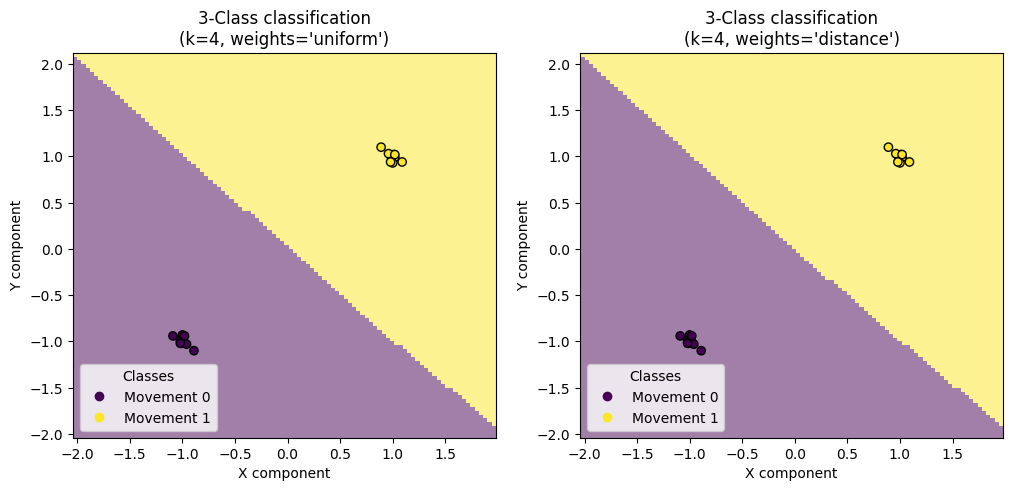

In [49]:
# Plotting of the results is a bit more involved in this case
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    # This is the command that trains the classifier
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="X component",
        ylabel="Y component",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(sensor_readings[:, 0], sensor_readings[:, 1], c=movement_labels, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        ["Movement 0", "Movement 1"],
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

We can now use this model and boundaries to predict what type of movement a new set of data would correspond to, for example:

In [50]:
# Let's predict what movement we have
new_data = np.array([
    [1.5, 0.7]
])

print(f"The new data corresponds to movement number {clf.predict(new_data)[0]}")

The new data corresponds to movement number 1


We can extend this concept to add further movements. However, if we add too many categories, or classes, we will start running into various issues.

For example, what would happen if the measurements were noisy, or we had measurements that belong to different classes but are close together?

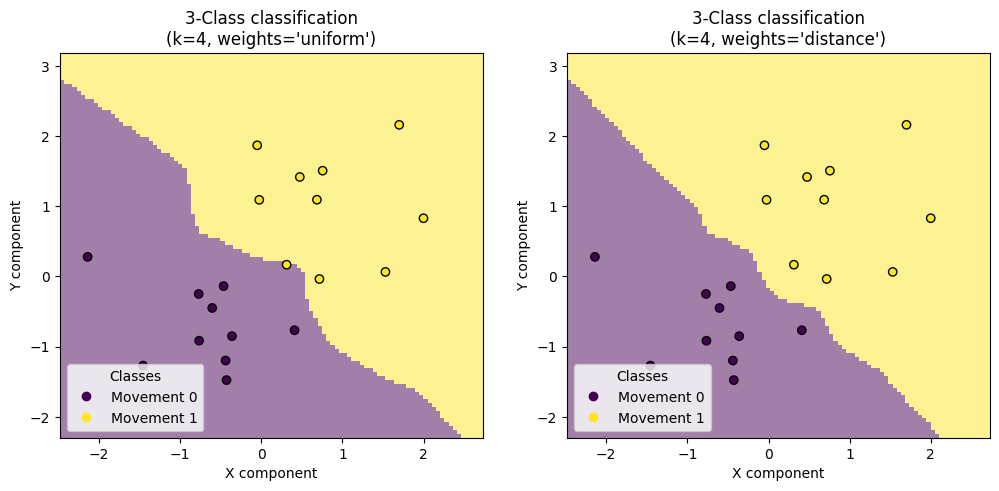

In [69]:
# These are our raw data points - pairs of `X` and `Y` data points. Aim to have at least 10 pairs per movement
sensor_readings = np.array([
    [-1, -1], [-1.01, -1.02], [-0.99, -0.98], [-1.02, -0.99], [-0.96, -1.03], [-1.02, -1.02], [-1, -0.93], [-0.89, -1.1], [-1.09, -0.94], [-0.98, -0.94],
    [1, 1], [1.01, 1.02], [0.99, 0.98], [1.02, 0.99], [0.96, 1.03], [1.02, 1.02], [1, 0.93], [0.89, 1.1], [1.09, 0.94], [0.98, 0.94]
])

noise_amount = 0.65
sensor_noise = np.random.normal(0, np.sqrt(noise_amount), size=np.shape(sensor_readings))
noisy_readings = sensor_readings + sensor_noise

# In this case, we need to say what readings correspond to what movements. We will use the labels `0` and `1` for now. When you add more movements, you can extend the labels to higher numbers.
movement_labels = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1
])

# Splitting datasets into training and testing subsets is a standard step in many machine learning algorithms
X_train, X_test, y_train, y_test = train_test_split(noisy_readings, movement_labels, stratify=movement_labels, random_state=0)

# This is the command that builds, trains, and tests the classifier
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=4))]
)

# Plotting of the results is a bit more involved in this case
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    # This is the command that trains the classifier
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="X component",
        ylabel="Y component",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(noisy_readings[:, 0], noisy_readings[:, 1], c=movement_labels, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        ["Movement 0", "Movement 1"],
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Try and run the code above a few times, as every time new noise is generated. As you can see, sometimes the boundary between the two movements falls in such a way that there are values that are in the wrong region, or values that change what class they belong to depending on what method for classifying we use.

## Neural Networks from Scratch

So far we have explored how one might use AI/ML tools and techniques in practice, taking advantage of existing libraries that implement various algorithms. Our main activities in this role have been to:
- Collect or obtain data to use for training, testing, and evaluation of our models
- Prepare the data to be in a suitable format for the various algorithms
- Pick an appropriate type of model to use
- Potentially decide on the specific architecture of the model, e.g., number of neighbours, number of layers, etc.
- Train the model
- Evaluate the performance of the model
- Repeat if necessary

While all of these steps are important in and of themselves, and they all require domain expertise in machine learning and AI, it also helps to explore the foundations of the field and re-create simple algorithms from scratch. This is one of the best ways to learn how something works, so then we know how to improve it.

Here are some recommended articles that discuss, in detail, how to build a neural network from scratch in Python:
- [Python AI: How to Build a Neural Network & Make Predictions](https://realpython.com/python-ai-neural-network/)
- [Let’s code a Neural Network in plain NumPy](https://archive.is/fjcou)
- [A Neural Network in 11 lines of Python (Part 1)](https://archive.ph/UApMA)
- [A Neural Network in 13 lines of Python (Part 2 - Gradient Descent)](https://archive.ph/I1VO4)
- [A Neural Network in 16 lines of Python (Part 3 - Hinton's Dropout in 3 Lines of Python)](https://archive.ph/VQA1K)

Sometimes, there is maths involved too, and that's okay! For people who are interested in the mathematical foundations of machine learning and AI, the following resources are a good start:
- [Pen and Paper Exercises in Machine Learning](https://arxiv.org/abs/2206.13446)
- [Deep Dive into Math Behind Deep Networks](https://archive.is/fnuns)
- [Preventing Deep Neural Network from Overfitting](https://archive.is/Oiht8)
- [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI)